# 연습문제

In [8]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# 코랩의 경우 나눔 폰트를 설치합니다.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# 나눔 폰트를 사용합니다.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 1.

문제: (3장에서 소개한) MNIST 데이터셋을 로드하고 훈련 세트와 테스트 세트로 분할합니다(처음 60,000개는 훈련을 위한 샘플이고 나머지 10,000개는 테스트용입니다).

In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")

MNIST 데이터 세트는 이전에 로드되었습니다.

In [11]:
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

문제: 이 데이터셋에 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 시간을 잰 다음, 테스트 세트로 만들어진 모델을 평가합니다.

In [12]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state = 42)

In [13]:
%time rnd_clf.fit(X_train, y_train)

CPU times: user 1min, sys: 76.6 ms, total: 1min
Wall time: 1min 1s


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score

y_pred_org = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_org)

0.9705


문제: 그런 다음 PCA를 사용해 설명된 분산이 95%가 되도록 차원을 축소합니다.

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

문제: 이 축소된 데이터셋에 새로운 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 확인합니다. 훈련 속도가 더 빨라졌나요?

In [16]:
rnd_clf2 = RandomForestClassifier(random_state = 42)
%time rnd_clf2.fit(X_reduced, y_train)

CPU times: user 3min 12s, sys: 238 ms, total: 3min 12s
Wall time: 3min 16s


RandomForestClassifier(random_state=42)

문제: 이제 테스트 세트에서 이 분류기를 평가해보세요. 이전 분류기와 비교해서 어떤가요?

In [17]:
X_test_reduced = pca.transform(X_test)

y_pred_pca = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred_pca)

0.9488

문제: SGDClassifier로 다시 시도해 보세요. PCA가 얼마나 도움이 되나요?

In [18]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(random_state=42)
%time sgdc.fit(X_train, y_train)
y_pred_org = sgdc.predict(X_test)
score_org = accuracy_score(y_test, y_pred_org)

CPU times: user 3min 25s, sys: 355 ms, total: 3min 26s
Wall time: 3min 27s


PCA가 SGDClassifier에 얼마나 도움이 될 수 있는지 보고 싶습니다. 축소된 데이터 세트를 사용하여 훈련해 봅시다:

In [20]:
sgdc2 = SGDClassifier(random_state=42)
%time sgdc2.fit(X_reduced, y_train)
y_pred_pca = sgdc2.predict(X_test_reduced)
score_pca = accuracy_score(y_test, y_pred_pca)

CPU times: user 51.8 s, sys: 36.9 ms, total: 51.8 s
Wall time: 58.2 s


모델의 정확도를 확인해 봅시다:

In [21]:
print("정확도 변화")
print(score_org, score_pca)

정확도 변화
0.874 0.8959


# 2.

문제: t-SNE 알고리즘을 사용해 MNIST 데이터셋의 처음 5,000개 이미지를 2차원으로 축소시키고 맷플롯립으로 그래프를 그려보세요. 이미지의 타깃 클래스마다 10가지 색상으로 나타낸 산점도를 그릴 수 있습니다.

작업 속도를 높이기 위해 MNIST 훈련 세트의 첫 5,000개 이미지로 제한해 보겠습니다.

In [22]:
X_sample, y_sample = X_train[:5000], y_train[:5000]

데이터 집합을 그래프로 그릴 수 있도록 t-SNE를 사용하여 차원을 2D로 줄여 보겠습니다:

In [23]:
from sklearn.manifold import TSNE
import numpy as np

y_sample_int = y_sample.astype(np.uint8)
tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X_sample)

이제 Matplotlib의 scatter() 함수를 사용하여 각 숫자에 대해 다른 색상을 사용하여 산점도를 그려 보겠습니다:

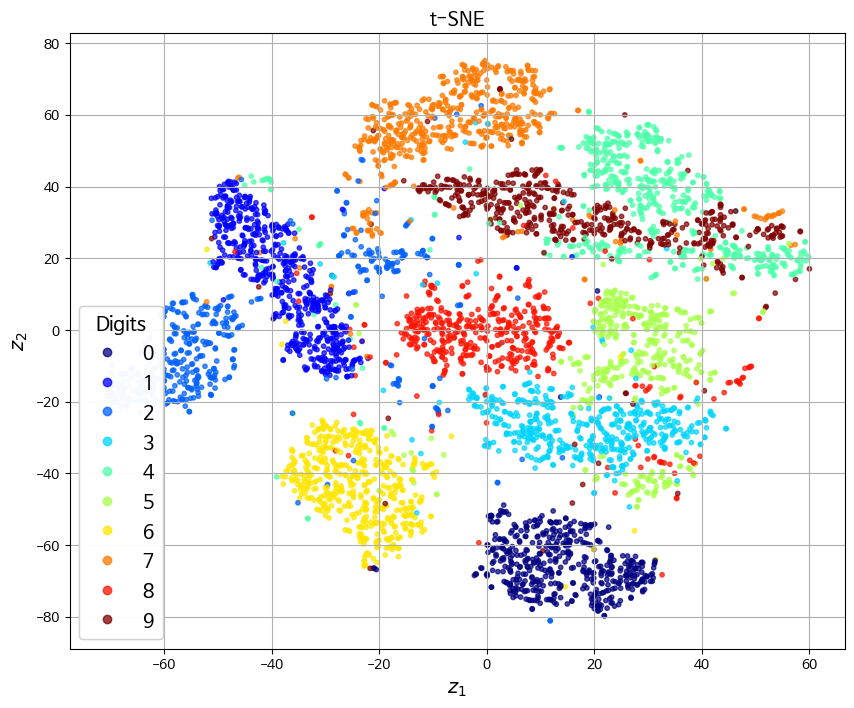

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title("t-SNE")
scatter = plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y_sample_int, cmap="jet", s=10, alpha=0.7)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.grid(True)

legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Digits")
plt.gca().add_artist(legend1)

plt.show()

숫자 4와 9만 시각화 해보겠습니다:

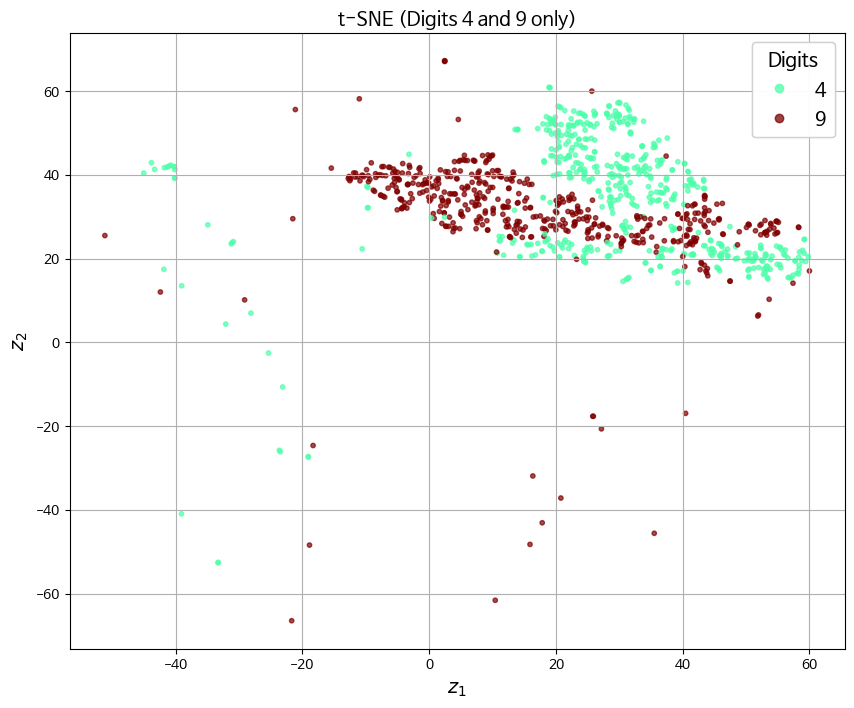

In [30]:
target_digits = [4, 9]
mask = np.isin(y_sample_int, target_digits)

X_4_9 = X_reduced_tsne[mask]
y_4_9 = y_sample_int[mask]

plt.figure(figsize=(10, 8))
scatter2 = plt.scatter(X_4_9[:, 0], X_4_9[:, 1],
                      c=y_4_9,
                      cmap="jet",
                      vmin=0,
                      vmax=9,
                      s=10,
                      alpha=0.7)

plt.title(f"t-SNE (Digits {target_digits[0]} and {target_digits[1]} only)")
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.grid(True)

legend1 = plt.legend(*scatter2.legend_elements(),
                    loc="best", title="Digits")
plt.gca().add_artist(legend1)

plt.show()

이 두 개의 숫자만으로 t-SNE를 실행해 보겠습니다:

In [31]:
X_4_9_full = X_sample[mask]
y_4_9_full = y_sample_int[mask]

tsne_4_9 = TSNE(n_components=2, init="random", learning_rate="auto",
                random_state=42)

X_reduced_tsne_4_9 = tsne_4_9.fit_transform(X_4_9_full)

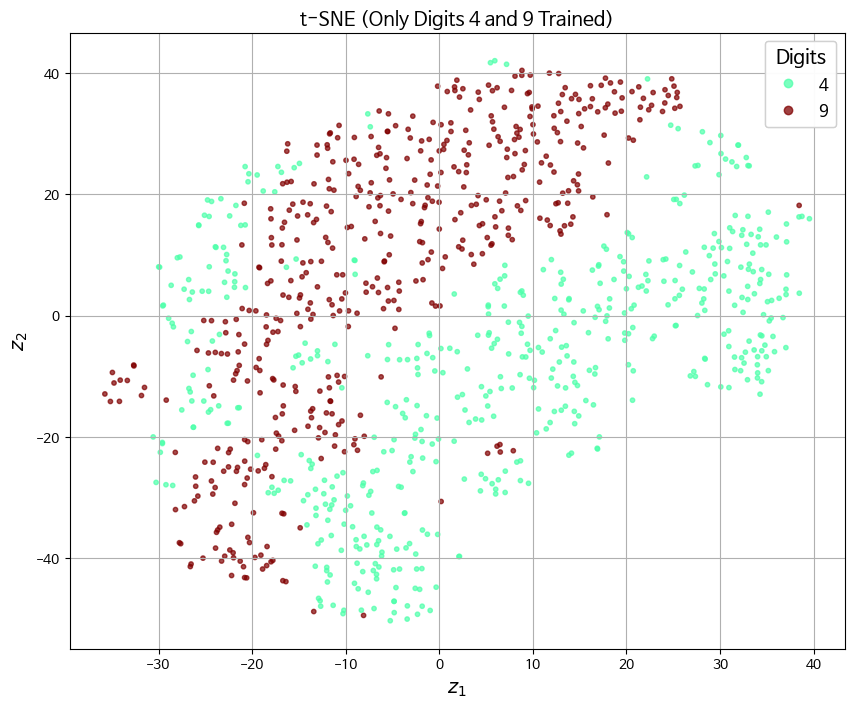

In [33]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced_tsne_4_9[:, 0], X_reduced_tsne_4_9[:, 1],
                      c=y_4_9_full,
                      cmap="jet",
                      vmin=0,
                      vmax=9,
                      s=10,
                      alpha=0.7)

plt.title(f"t-SNE (Only Digits {target_digits[0]} and {target_digits[1]} Trained)")
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.grid(True)

legend1 = plt.legend(*scatter.legend_elements(),
                    loc="best", title="Digits", fontsize=12)
plt.gca().add_artist(legend1)

plt.show()